# Plotting paleo RSL data using KDE density plots
This script plots sea level data to highlight spatio-temporal clustering using the seaborn Kernel Density Estimate plot template. Relative Sea Level data is provided via a spreadsheet containing the following columns:

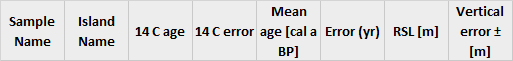

Then, it applies a monte-carlo simulation (10<sup>4</sup> permutations) to calculate data clustering. The simulation first samples a random row, then extracts time and RSL from a gaussian distribution calculated from the data in the spreadsheet.
Then, the Seaborn Joint Kernel Density Estimate is used to plot the sea level data and highlight spatio-temporal clusterings in the distribution.

If the script stops working, stop and restart the Kernel, clearing all outputs.

In [1]:
from sys import executable, argv
from subprocess import check_output
from PyQt5.QtWidgets import QFileDialog, QApplication

def gui_fname(directory='./'):
    """Open a file dialog, starting in the given directory, and return
    the chosen filename"""
    # run this exact file in a separate process, and grab the result
    file = check_output([executable, __file__, directory])
    return file.strip()

if __name__ == "__main__":
    directory = argv[1]
    app = QApplication([directory])
    fname = QFileDialog.getOpenFileName(None, "Select a file...", 
            directory, filter="All files (*)")
    print ('The file name analysed is')
    print(fname[0])
    

The file name analysed is
C:/Users/arovere/Documents/GitHub/SE-Asia-Sealevel/Second revision/RSL density plots/Holocene_All_minus_BL.xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the dataframe
RSL=pd.read_excel(fname[0], header=0)
print ('Table 1 - Sea level data used')
RSL

Table 1 - Sea level data used


,Sample Name,Island Name,14 C age,14 C error,Mean age [cal a BP],Error (yr),RSL [m],Vertical error ± [m]
0,BB_FMA11,Bone Batang,4630,30,4869.0,75.0,0.227636,0.223342
1,BB_FMA12,Bone Batang,4910,30,5196.0,118.0,0.177636,0.223342
2,BB_FMA13,Bone Batang,3750,30,3692.5,107.5,0.157636,0.223342
3,KK_FMA14,Kodingareng Keke,4970,30,5342.5,87.5,0.019507,0.117154
4,KK_FMA15,Kodingareng Keke,5500,30,5868.5,98.5,0.009507,0.117154
5,KK_FMA16,Kodingareng Keke,5160,30,5519.5,65.5,0.129507,0.117154
6,KK_FMA17,Kodingareng Keke,5160,30,5519.5,65.5,0.049507,0.117154
7,SB_FMA18,Sanrobengi,4730,30,4954.5,109.5,0.136250,0.123552
8,SB_FMA19,Sanrobengi,5560,30,5956.5,83.5,0.216250,0.123552
9,SB_FMA20,Sanrobengi,5140,30,5509.5,66.5,0.496250,0.226639


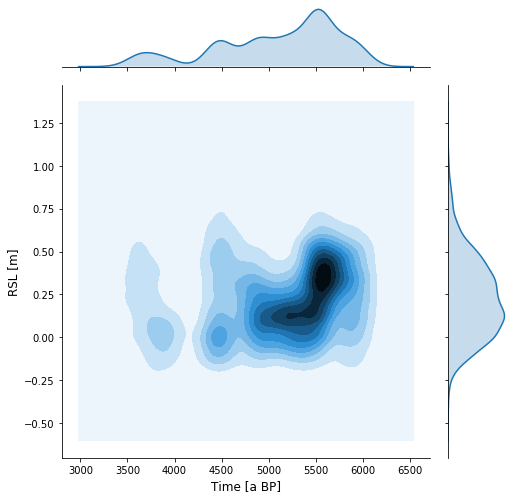

In [4]:
time=[]
rsl=[]

val = np.linspace(0, 10000, num=10001)

#Creates a matrix randomly sampling the sea level data points
for x in val:
 #Select a random row
 rnd = RSL.sample(n=1)
 #Select random time and RSL from normal distribution of age and RSL
 time.append(np.random.normal(rnd['Mean age [cal a BP]'], rnd['Error (yr)'], 1))
 rsl.append(np.random.normal(rnd['RSL [m]'], rnd['Vertical error ± [m]'], 1));

#Create the dataframe
RSLrand = pd.DataFrame({'Time':time, 'RSL':rsl})
RSLrand['Time'] = RSLrand['Time'].astype(float)
RSLrand['RSL'] = RSLrand['RSL'].astype(float)

#Delete all values where time is "future"
RSLrand = RSLrand[RSLrand['Time'] > 0]

# Plot the figure
graph=sns.jointplot(RSLrand['Time'], RSLrand['RSL'], kind="kde", height=7, space=0.3)
graph.set_axis_labels('Time [a BP]', 'RSL [m]', fontsize=12)

#Uncomment if you want to use defined axes limits
#graph.ax_marg_x.set_xlim(0, 500)
#graph.ax_marg_y.set_ylim(-1, 0.5)

#Uncomment if you want to save a figure for external editing
#graph.savefig("RSL_KDE.svg")

In [5]:
#Calculates averages and stdev of entire dataset
Time_avg=RSLrand['Time'].mean()
Time_sd=RSLrand['Time'].std()
RSL_avg=RSLrand['RSL'].mean()
RSL_sd=RSLrand['RSL'].std()
print ("The average timing of the dataset is {:6.2f} ± {:6.1f} yrs".format(Time_avg, Time_sd))
print ("The average RSL of the dataset is {:6.2f} ± {:6.2f} m".format(RSL_avg, RSL_sd))

#Calculate SL change rates
Rate_avg=(RSL_avg*1000)/Time_avg #mm/yr
Rate_std=abs(Rate_avg)*np.sqrt((RSL_sd/RSL_avg)**2 + (Time_sd/Time_avg)**2)
print ("The average RSL change rate is {:6.2f} ± {:6.1f} mm/yr".format(Rate_avg, Rate_std))

The average timing of the dataset is 5100.37 ±  652.6 yrs
The average RSL of the dataset is   0.23 ±   0.24 m
The average RSL change rate is   0.04 ±    0.0 mm/yr


**Main code help from:**<br>
https://stackoverflow.com/questions/20790926/ipython-notebook-open-select-file-with-gui-qt-dialog<br>
https://stackoverflow.com/questions/46971525/journal-quality-kde-plots-with-seaborn-pandas<br>

**Reference**<br>
This script is part of the Supplementary material of Bender et al., Climate of the Past, Under rev.

**Acknowledgments**<br>
This work was supported through grant SEASCHANGE (RO-5245/1-1) from the Deutsche Forschungsgemeinschaft (DFG) as part of the Special Priority Program (SPP)-1889 “Regional Sea Level Change and Society”